# **Task:3**
# **CUSTOMER CHURN PREDICTION**

# Develop a model to predict customer churn for a subscription-based service or business. Use historical customer data, includingfeatures like usage behavior and customer demographics, and tryalgorithms like Logistic Regression, Random Forests, or GradientBoosting to predict churn.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

* Step:1 Loading the datast

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* Step:2 Preprocessing Data

In [4]:
# Drop the uncessary columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# cheak if there any null value or not
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Cheak if there any duplicate value or not
df.duplicated().sum()

0

In [9]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

* Step:3 Label Encoding

In [10]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [11]:
# Separate features and target variable
X = df.drop('Exited', axis=1)
y = df['Exited']

In [12]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

* Step:4 Data Splitting

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

* Step:5 Fitting a model

In [14]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [15]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

* Step:6 Evaluate the Models

In [17]:
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "Gradient Boosting": gb_clf
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.81
Random Forest Accuracy: 0.86
Gradient Boosting Accuracy: 0.87


In [18]:
accuracies = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}\n")
    accuracies.append((name, accuracy))


Logistic Regression Accuracy: 0.8150
Logistic Regression Confusion Matrix:
[[1559   48]
 [ 322   71]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


Random Forest Accuracy: 0.8640
Random Forest Confusion Matrix:
[[1545   62]
 [ 210  183]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000


Gradient Boosting Accuracy: 0.8655
Gradient Boosting Confusion Matrix:
[

* Step:7 Visualization

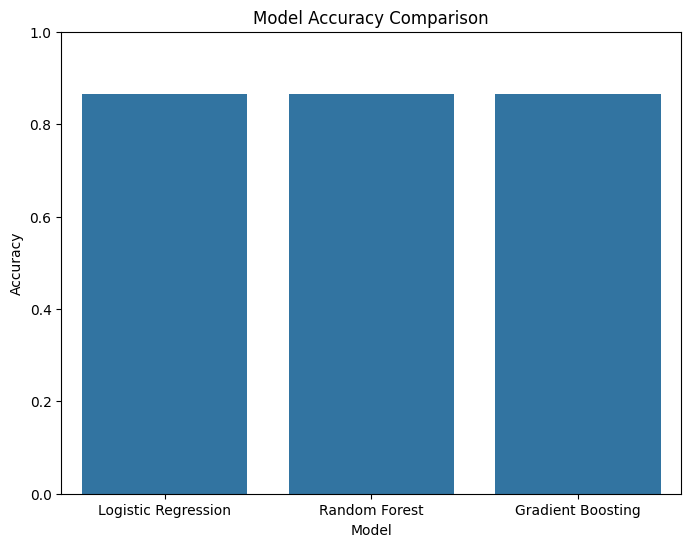

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
model_names, model_accuracies = zip(*accuracies)
plt.figure(figsize=(8, 6))
sns.barplot(x=list(model_names), y=list(model_accuracies))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

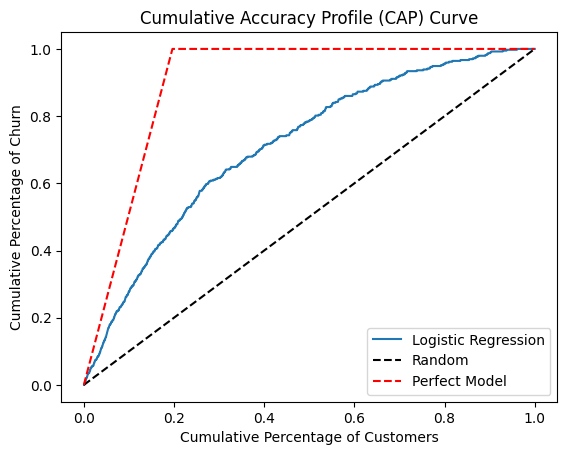

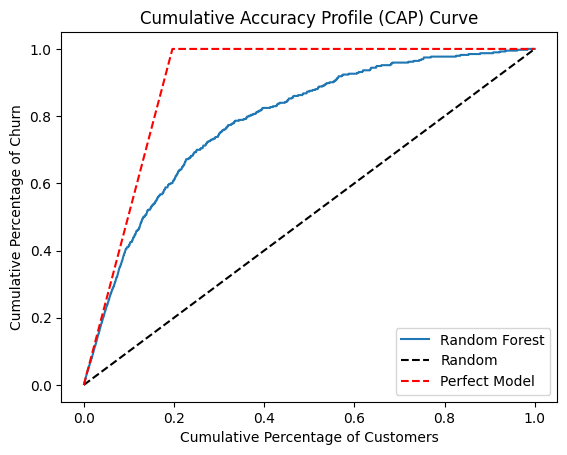

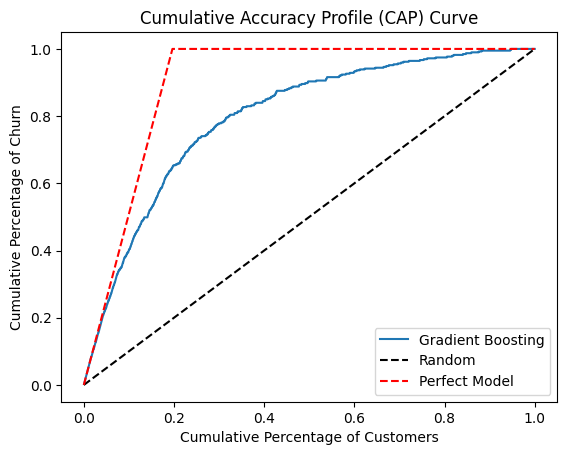

In [20]:
def plot_cap_curve(model, X_test, y_test, model_name):
    y_probs = model.predict_proba(X_test)[:, 1]

    data = pd.DataFrame({'actual': y_test, 'prob': y_probs})
    data = data.sort_values(by='prob', ascending=False).reset_index(drop=True)

    data['cum_actual'] = data['actual'].cumsum()
    data['total'] = data.index + 1
    data['cum_actual_rate'] = data['cum_actual'] / data['actual'].sum()
    data['cum_total_rate'] = data['total'] / len(data)

    plt.plot(data['cum_total_rate'], data['cum_actual_rate'], label=model_name)
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.plot([0, data['actual'].sum()/len(data), 1], [0, 1, 1], 'r--', label='Perfect Model')
    plt.xlabel('Cumulative Percentage of Customers')
    plt.ylabel('Cumulative Percentage of Churn')
    plt.title('Cumulative Accuracy Profile (CAP) Curve')
    plt.legend()
    plt.show()

for name, model in models.items():
    plot_cap_curve(model, X_test, y_test, name)

* Best Model

In [21]:
from sklearn.metrics import accuracy_score
log_reg_pred = log_reg.predict(X_test)
rf_clf_pred = rf_clf.predict(X_test)
gb_clf_pred = gb_clf.predict(X_test)

log_reg_acc = accuracy_score(y_test, log_reg_pred)
rf_clf_acc = accuracy_score(y_test, rf_clf_pred)
gb_clf_acc = accuracy_score(y_test, gb_clf_pred)

best_model = None
best_accuracy = 0
for model_name, model_acc in [("Logistic Regression", log_reg_acc), ("Random Forest", rf_clf_acc), ("Gradient Boosting", gb_clf_acc)]:
    if model_acc > best_accuracy:
        best_model = model_name
        best_accuracy = model_acc

print(f"Best Model: {best_model} with accuracy of {best_accuracy:.2f}")


Best Model: Gradient Boosting with accuracy of 0.87


* Step:8 Predictions

In [22]:
# Assuming we select Gradient Boosting as the best model here
best_model = gb_clf

In [23]:
# Make predictions on the test set
y_pred_best = best_model.predict(X_test)
y_pred_best

array([0, 0, 0, ..., 1, 0, 0])

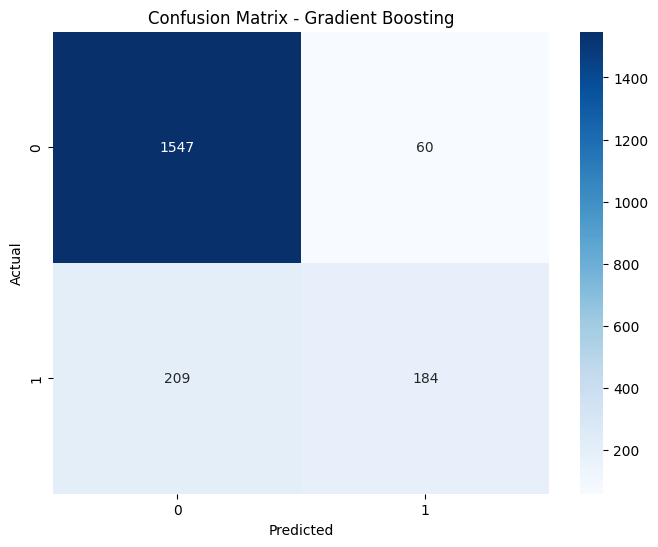

In [24]:
# Confusion Matrix for the best model (assuming Gradient Boosting is the best)
best_model = gb_clf
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

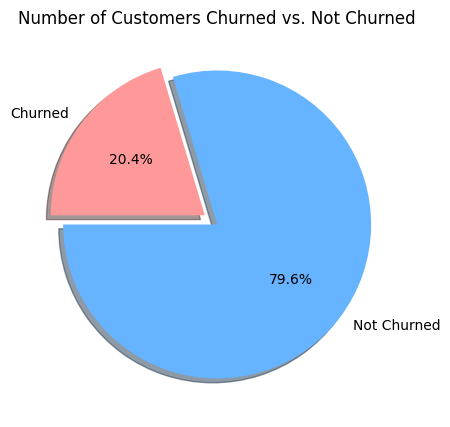

In [25]:
not_churned = df[df['Exited'] == 0]['Exited'].count()
churned = df[df['Exited'] == 1]['Exited'].count()

# Create the pie chart
fig = plt.figure(figsize=(5, 5))
plt.pie([not_churned, churned], labels=['Not Churned', 'Churned'], explode=(0, 0.1),
        shadow=True, autopct="%1.1f%%", startangle=180, colors=['#66b3ff','#ff9999'])
plt.title('Number of Customers Churned vs. Not Churned')
plt.show()

# **Conclusion**

# This problem successfully developed a predictive model for customer churn using churn_modelling data. The Gradient Boosting Classifier outperformed Logistic Regression and Random Forest in terms of accuracy(0.87).